# Exercise - Hadamard matrix multiplication with SVM

Hadamard matrix multiplication is where the values in matrices **D** and **E** at coordinates (i0,i1) are multiplied together to set the value at coordinates (i0,i1) in matrix **F**.

<figure style="margin-left:auto; margin-right:auto; width:80%;">
    <img style="vertical-align:middle" src="../images/elementwise_multiplication.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Elementwise multiplication of matrices D and E to get F.</figcaption>
</figure>

Using rectangular copies is an important skill to master, especially when you are decomposing your problem into sections that are to be handled by different devices. In this exercise we are going enable the elementwise matrix multiplication code to use a **rectangular copy** to copy memory back to the host. The source code to edit is located in [mat_elementwise_svm.cpp](mat_elementwise.cpp) and the kernel is in [kernels_elementwise.c](kernels_elementwise.c). Matrices **D** and **E** are read in from disk and matrix **F** is produced as the output. Your task is to make the necessary change so that copies back from **buffer_F** uses a **rectangular** copy instead of the normal copy.

## Constructing the inputs and solution

As before, we construct input matrices and call them **D** and **E**.

In [17]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../include"))

import py_helper

%matplotlib widget

# Matrices D, E, F are of size (NROWS_F, NCOLS_F)
NROWS_F = 520
NCOLS_F = 1032

# Data type
dtype = np.float32

mat_mul=py_helper.Hadamard(NROWS_F, NCOLS_F, dtype)
mat_mul.make_data()

## Run the code

In [18]:
!make; ./mat_elementwise.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864


## Check the output

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
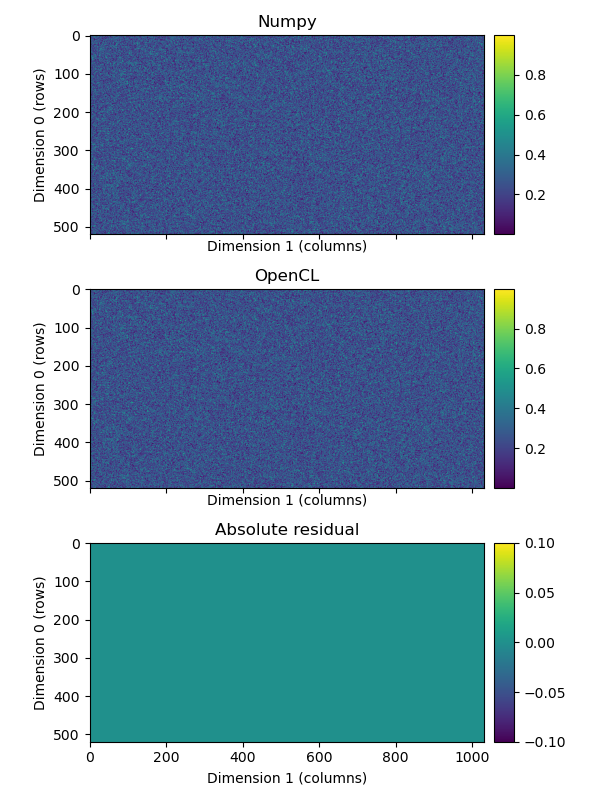

In [19]:
mat_mul.check_data()

## Tasks

1. Load up the documentation for [clEnqueueReadBufferRect](https://www.khronos.org/registry/OpenCL/sdk/3.0/docs/man/html/clEnqueueReadBufferRect.html).
1. In [mat_mult_local.cpp:157](mat_mult_local.cpp) there is an example for performing a rectangular copy using [clEnqueueWriteBufferRect](https://www.khronos.org/registry/OpenCL/sdk/3.0/docs/man/html/clEnqueueWriteBufferRect.html). Copy-paste that code to [mat_elementwise.cpp](mat_elementwise.cpp) and begin modifications.

### Answer

You can of course always look at the answer, in [mat_elementwise_svm_answer.cpp](mat_elementwise_svm_answer.cpp) and run the answer below.

In [15]:
!make; ./mat_elementwise_answer.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
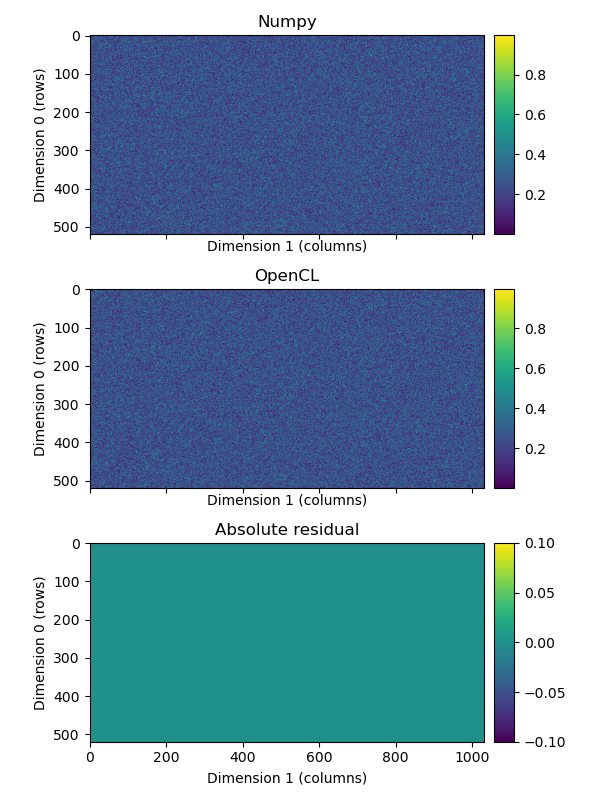

In [16]:
mat_mul.check_data()